In [97]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Values Pulse Check 2023_Overall_Raw Data.xlsx")

df = df.iloc[1:].reset_index(drop=True)

df = df[["Q9", "Q11", "Q13", "Q15", "Q17", "Q19"]]

df.head()

,Q9,Q11,Q13,Q15,Q17,Q19
0,Important,Important,Important\t,Important\t,Very important,Important\t
1,Very important,Very important,Important\t,Very important,Very important,Important\t
2,Neutral,Not important,Not important,Not important,Not important,Not important
3,Neutral,Important,Less important\t,Neutral,Not important,Less important\t
4,Very important,Very important,Very important,Very important,Very important,Very important


In [98]:
df.columns = ['TRUST', 'ENTREPRENEURIAL SPIRIT', 'YOUTHFUL SPIRIT', 'SIMPLICITY & QUALITY', 'TEAM MENTALITY', 'PERSONAL OWNERSHIP' ]

In [99]:
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP
0,Important,Important,Important\t,Important\t,Very important,Important\t
1,Very important,Very important,Important\t,Very important,Very important,Important\t
2,Neutral,Not important,Not important,Not important,Not important,Not important
3,Neutral,Important,Less important\t,Neutral,Not important,Less important\t
4,Very important,Very important,Very important,Very important,Very important,Very important


In [100]:
def get_null_values(df):
    null_values = df.isnull().sum()

    print("Shape: ", df.shape)
    print("Null values in each column:\n", null_values)

In [101]:
df.dropna(inplace=True)

In [102]:
get_null_values(df)

Shape:  (3019, 6)
Null values in each column:
 TRUST                     0
ENTREPRENEURIAL SPIRIT    0
YOUTHFUL SPIRIT           0
SIMPLICITY & QUALITY      0
TEAM MENTALITY            0
PERSONAL OWNERSHIP        0
dtype: int64


In [103]:
print("Unique values in the column: ", df["YOUTHFUL SPIRIT"].unique())

Unique values in the column:  ['Important\t' 'Not important' 'Less important\t' 'Very important'
 'Neutral' 'No answer']


In [104]:
columns_to_map = ['TRUST', 'ENTREPRENEURIAL SPIRIT', 'YOUTHFUL SPIRIT', 'SIMPLICITY & QUALITY', 'TEAM MENTALITY', 'PERSONAL OWNERSHIP']


df = df[columns_to_map].applymap(lambda x: x.replace('\t', '').strip().lower() if isinstance(x, str) else x)


In [105]:
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP
0,important,important,important,important,very important,important
1,very important,very important,important,very important,very important,important
2,neutral,not important,not important,not important,not important,not important
3,neutral,important,less important,neutral,not important,less important
4,very important,very important,very important,very important,very important,very important


In [106]:
mapping = {
    'very important': 5,
    'important': 4,
    'neutral': 3,
    'less important': 2,
    'not important': 1,
}

# List of columns to apply the mapping
columns_to_map = ['TRUST', 'ENTREPRENEURIAL SPIRIT', 'YOUTHFUL SPIRIT', 'SIMPLICITY & QUALITY', 'TEAM MENTALITY', 'PERSONAL OWNERSHIP']



# Apply the mapping to each column
for col in columns_to_map:
    df[col] = df[col].map(mapping)

# Display the DataFrame with the mapped columns
print(df)

      TRUST  ENTREPRENEURIAL SPIRIT  YOUTHFUL SPIRIT  SIMPLICITY & QUALITY  \
0       4.0                     4.0              4.0                   4.0   
1       5.0                     5.0              4.0                   5.0   
2       3.0                     1.0              1.0                   1.0   
3       3.0                     4.0              2.0                   3.0   
4       5.0                     5.0              5.0                   5.0   
...     ...                     ...              ...                   ...   
3491    4.0                     4.0              4.0                   4.0   
3498    3.0                     4.0              3.0                   4.0   
3499    5.0                     5.0              4.0                   5.0   
3502    5.0                     4.0              5.0                   5.0   
3503    4.0                     4.0              4.0                   4.0   

      TEAM MENTALITY  PERSONAL OWNERSHIP  
0                5.0

In [107]:
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP
0,4.0,4.0,4.0,4.0,5.0,4.0
1,5.0,5.0,4.0,5.0,5.0,4.0
2,3.0,1.0,1.0,1.0,1.0,1.0
3,3.0,4.0,2.0,3.0,1.0,2.0
4,5.0,5.0,5.0,5.0,5.0,5.0


In [108]:
# df.dropna(inplace=True)

In [109]:
df.shape

(3019, 6)

In [110]:
# # List of columns to apply the mapping
# columns_to_map = ['DIVISION', 'TRUST', 'ENTREPRENEURIAL SPIRIT', 'YOUTHFUL SPIRIT', 'SIMPLICITY & QUALITY', 'TEAM MENTALITY', 'PERSONAL OWNERSHIP']

# # Clean the data by stripping extra spaces and tabs, then apply the mapping
# df_cleaned = df[columns_to_map].applymap(lambda x: x.strip())  # Removes leading/trailing whitespaces

# # Apply the mapping to each column after cleaning
# df_mapped = df_cleaned.applymap(lambda x: mapping.get(x, 0))  # Assign 0 if mapping is not found

# # Calculate the sum for each column
# quality_sums = df_mapped.sum()

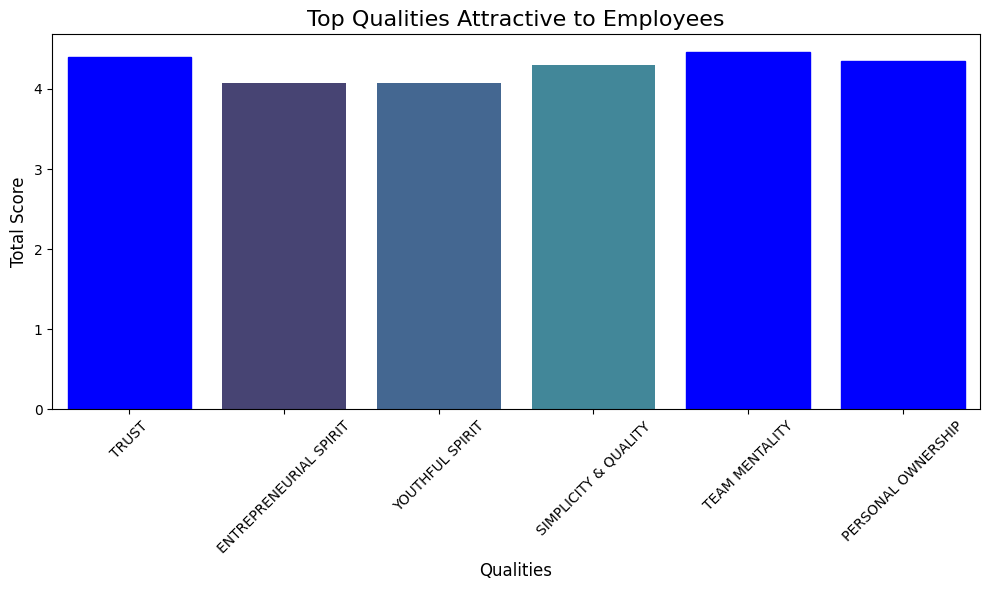

In [111]:
# Calculate the sum for each column
quality_sums = df.mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=quality_sums.index, y=quality_sums.values, palette="mako")

# Highlight the top 3 qualities by color
top_3_qualities = quality_sums.nlargest(3).index
for bar, label in zip(bars.patches, quality_sums.index):
    if label in top_3_qualities:
        bar.set_color('blue')  # Highlight top 3 in orange

# Add labels and title
plt.title('Top Qualities Attractive to Employees', fontsize=16)
plt.ylabel('Total Score', fontsize=12)
plt.xlabel('Qualities', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

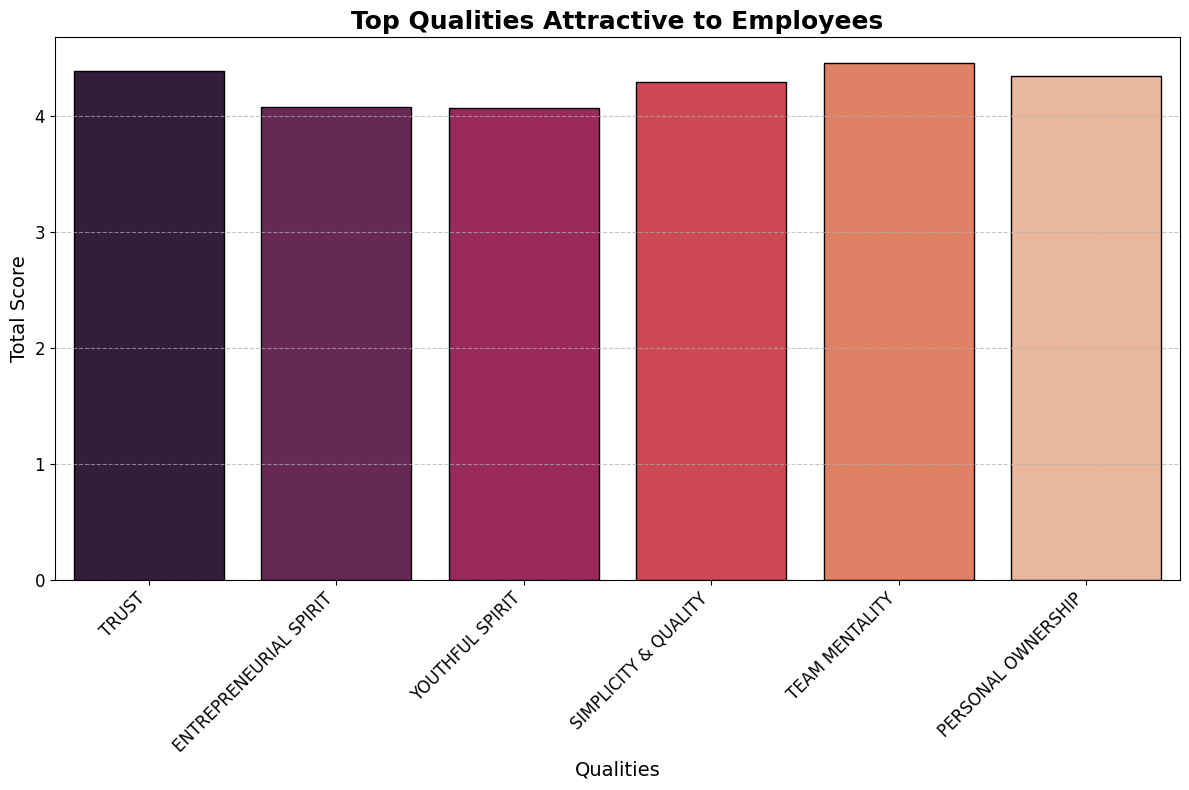

In [112]:
# Plot the bar graph
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=quality_sums.index, y=quality_sums.values, palette="rocket", edgecolor="black")

# Highlight the top 3 qualities by color
top_3_qualities = quality_sums.nlargest(3).index
for bar in bars.patches:
    if bar.get_label() in top_3_qualities:
        bar.set_facecolor('orange')  # Highlight top 3 in orange

# Add labels and title with enhanced formatting
plt.title('Top Qualities Attractive to Employees', fontsize=18, weight='bold')
plt.ylabel('Total Score', fontsize=14)
plt.xlabel('Qualities', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Add value annotations on bars
# for bar in bars.patches:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.1, int(height), ha='center', va='bottom', fontsize=12, weight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()